<a href="https://colab.research.google.com/github/bharatgirdhar/EVA6_Session5/blob/main/EVA6_Session_5_Assigment_99_41.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.dropout=nn.Dropout(0.05)
        self.conv1 = nn.Conv2d(1, 8, 3, padding=1,bias=False) #28
        self.BatchNorm1=nn.BatchNorm2d(8)
        #self.conv2 = nn.Conv2d(8, 8, 3, padding=1,bias=False)#28 
        #self.BatchNorm2=nn.BatchNorm2d(8)
        self.conv3 = nn.Conv2d(8, 16, 3, padding=1,bias=False)#28
        self.BatchNorm3=nn.BatchNorm2d(16)
        self.pool1 = nn.MaxPool2d(2, 2)#14
        
        self.conv4 = nn.Conv2d(16, 8, 1, bias=False)#14
        self.BatchNorm4=nn.BatchNorm2d(8)
        #self.conv5 = nn.Conv2d(8, 8, 3,bias=False)#12
        #self.BatchNorm5=nn.BatchNorm2d(8)
        self.conv6 = nn.Conv2d(8, 8, 3, bias=False)#12
        self.BatchNorm6=nn.BatchNorm2d(8)
        self.conv7 = nn.Conv2d(8, 16, 3, bias=False)#10
        self.BatchNorm7=nn.BatchNorm2d(16)
        self.conv8 = nn.Conv2d(16, 8, 1, bias=False)#10
        self.BatchNorm8=nn.BatchNorm2d(8)
        self.conv9 = nn.Conv2d(8, 16, 3, bias=False)#8
        self.BatchNorm9=nn.BatchNorm2d(16)
        self.conv10 = nn.Conv2d(16, 32, 3, bias=False)#6
        self.BatchNorm10=nn.BatchNorm2d(32)
        self.gap1=nn.AdaptiveAvgPool2d(1)

        self.fc1=nn.Linear(in_features=32, out_features=10)


    def forward(self, x):
        
        x = self.pool1(self.dropout(F.relu(self.BatchNorm3(self.conv3(self.dropout(F.relu(self.BatchNorm1(self.conv1(x)))))))))
        #print(x.shape)
        x = self.dropout(F.relu(self.BatchNorm7(self.conv7(self.dropout(F.relu(self.BatchNorm6(self.conv6(self.dropout(F.relu(self.BatchNorm4(self.conv4(x))))))))))))
        #print(x.shape)
        x = F.relu(self.BatchNorm10(self.conv10(self.dropout(F.relu(self.BatchNorm9(self.conv9(self.dropout(F.relu(self.BatchNorm8(self.conv8(x)))))))))))
        #x = self.conv7(x)
        #print(x.shape)
        x = self.gap1(x)
        
        x = x.view(-1, 32)
        #print(x.shape)
        x=self.fc1(x)
        return F.log_softmax(x)

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 28, 28]              72
       BatchNorm2d-2            [-1, 8, 28, 28]              16
           Dropout-3            [-1, 8, 28, 28]               0
            Conv2d-4           [-1, 16, 28, 28]           1,152
       BatchNorm2d-5           [-1, 16, 28, 28]              32
           Dropout-6           [-1, 16, 28, 28]               0
         MaxPool2d-7           [-1, 16, 14, 14]               0
            Conv2d-8            [-1, 8, 14, 14]             128
       BatchNorm2d-9            [-1, 8, 14, 14]              16
          Dropout-10            [-1, 8, 14, 14]               0
           Conv2d-11            [-1, 8, 12, 12]             576
      BatchNorm2d-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14           [-1, 16,

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


In [ ]:


torch.manual_seed(1)
batch_size = 128

train_transform=transforms.Compose([
                        transforms.RandomRotation(degrees=(-7.0,7.0),fill=(1,)),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])

test_transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])


train = datasets.MNIST('./data', train=True, download=True, transform=train_transform)
test = datasets.MNIST('./data', train=False, download=True, transform=test_transform)

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
#kwargs = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=64)

train_loader = torch.utils.data.DataLoader(
    train, batch_size=batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
    test, batch_size=batch_size, shuffle=True, **kwargs)


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0, dtype=torch.uint8)
 - max: tensor(255, dtype=torch.uint8)


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


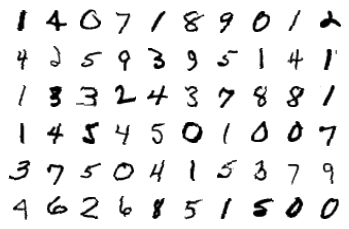

In [ ]:
# We'd need to convert it into Numpy! Remember above we have converted it into tensors already
train_data = train.train_data
#train_data = train.transform(train_data.numpy())

print('[Train]')
print(' - Numpy Shape:', train.train_data.cpu().numpy().shape)
print(' - Tensor Shape:', train.train_data.size())
print(' - min:', torch.min(train_data))
print(' - max:', torch.max(train_data))
#print(' - mean:', torch.mean(train_data))
#print(' - std:', torch.std(train_data))
#print(' - var:', torch.var(train_data))


dataiter = iter(train_loader)
images, labels = dataiter.next()

%matplotlib inline
import matplotlib.pyplot as plt

figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [ ]:
from tqdm import tqdm
import matplotlib.pyplot as plt

def train(model, device, train_loader, optimizer, epoch):
    model.train()
    train_loss=0
    pbar = tqdm(train_loader, leave="false")
    correct=0
    processed=0
    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        train_loss += loss
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum().item()
        processed += len(data)
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx} Accuracy={100.*correct/processed:0.2f}')
    print('\n\nEPOCH : ',epoch)
    print(f"\nTrain Loss{train_loss/len(train_loader.dataset)}")


def test(model, device, test_loader,epoch):
    model.eval()
    test_loss = 0
    correct = 0
    missed_pred=[]
    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(test_loader):
            data_copy=data
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()
            if epoch==19:
              for i in range(len(target)):
                if pred[i]!=target[i]:
                  
                  plt.imshow(data_copy[i].squeeze(0))
                  plt.show()
    test_loss /= len(test_loader.dataset)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    

In [ ]:
from torch.optim.lr_scheduler import StepLR

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.9)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

for epoch in range(1, 16):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader,epoch)

  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:47: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
loss=0.09655537456274033 batch_id=468 Accuracy=89.45: 100%|██████████| 469/469 [00:23<00:00, 20.25it/s]



EPOCH :  1

Train Loss0.0026724787894636393



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0672, Accuracy: 9811/10000 (98%)



loss=0.051283594220876694 batch_id=468 Accuracy=97.58: 100%|██████████| 469/469 [00:23<00:00, 20.14it/s]



EPOCH :  2

Train Loss0.0006251122686080635



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 9882/10000 (99%)



loss=0.0602545328438282 batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:23<00:00, 20.21it/s]




EPOCH :  3

Train Loss0.0005069823819212615


  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0378, Accuracy: 9886/10000 (99%)



loss=0.03522777184844017 batch_id=468 Accuracy=98.32: 100%|██████████| 469/469 [00:23<00:00, 19.96it/s]



EPOCH :  4

Train Loss0.0004369341768324375



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0418, Accuracy: 9870/10000 (99%)



loss=0.022978849709033966 batch_id=468 Accuracy=98.46: 100%|██████████| 469/469 [00:23<00:00, 19.80it/s]



EPOCH :  5

Train Loss0.00038276505074463785



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0258, Accuracy: 9917/10000 (99%)



loss=0.10000456124544144 batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:23<00:00, 19.85it/s]



EPOCH :  6

Train Loss0.00039344571996480227



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0272, Accuracy: 9917/10000 (99%)



loss=0.05341153219342232 batch_id=468 Accuracy=98.59: 100%|██████████| 469/469 [00:23<00:00, 19.75it/s]



EPOCH :  7

Train Loss0.00034875256824307144



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0270, Accuracy: 9911/10000 (99%)



loss=0.01689385622739792 batch_id=468 Accuracy=98.55: 100%|██████████| 469/469 [00:23<00:00, 19.88it/s]



EPOCH :  8

Train Loss0.00035410086275078356



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0288, Accuracy: 9911/10000 (99%)



loss=0.008584730327129364 batch_id=468 Accuracy=98.60: 100%|██████████| 469/469 [00:23<00:00, 19.85it/s]



EPOCH :  9

Train Loss0.00034129832056351006



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0223, Accuracy: 9929/10000 (99%)



loss=0.015294992364943027 batch_id=468 Accuracy=98.64: 100%|██████████| 469/469 [00:23<00:00, 19.73it/s]



EPOCH :  10

Train Loss0.00032814411679282784



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0231, Accuracy: 9925/10000 (99%)



loss=0.05347418412566185 batch_id=468 Accuracy=98.70: 100%|██████████| 469/469 [00:23<00:00, 19.74it/s]



EPOCH :  11

Train Loss0.00031769226188771427



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0234, Accuracy: 9922/10000 (99%)



loss=0.08495184034109116 batch_id=468 Accuracy=98.80: 100%|██████████| 469/469 [00:23<00:00, 19.62it/s]



EPOCH :  12

Train Loss0.0002923058345913887



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 9937/10000 (99%)



loss=0.043267715722322464 batch_id=468 Accuracy=98.84: 100%|██████████| 469/469 [00:23<00:00, 19.66it/s]



EPOCH :  13

Train Loss0.00028784401365555823



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 9941/10000 (99%)



loss=0.01475639920681715 batch_id=468 Accuracy=98.86: 100%|██████████| 469/469 [00:24<00:00, 19.45it/s]



EPOCH :  14

Train Loss0.0002850073797162622



  0%|          | 0/469 [00:00<?, ?it/s]


Test set: Average loss: 0.0277, Accuracy: 9909/10000 (99%)



loss=0.04833677411079407 batch_id=468 Accuracy=98.88: 100%|██████████| 469/469 [00:23<00:00, 19.66it/s]



EPOCH :  15

Train Loss0.00028367480263113976



Test set: Average loss: 0.0214, Accuracy: 9930/10000 (99%)

